# Project Overview: Bengaluru LST Prediction API

This project implements a ***Geospatial Machine Learning*** pipeline to analyze and predict the intensity of the ***Urban Heat Island (UHI)*** effect in Bengaluru. The analysis focuses on ***Land Surface Temperature (LST)*** across the 198 Bruhat Bengaluru Mahanagara Palike (BBMP) Wards.

The core objective is to identify wards most vulnerable to heat stress for targeted ***heat mitigation strategies***.

# Data Sources

The analysis relies on two primary geospatial datasets, derived from satellite imagery (Landsat/MODIS) using ***Google Earth Engine*** and prepared using ***QGIS***.

| Dataset |Filename| Description |
|:-------------|:--------------|:--------------|
| Land Surface Temperature (LST)     | BBMP_Wards_LST_Metrics.csv        | Mean LST in Celsius (Mean_LST_C) per BBMP Ward.       |
| Land Use/Land Cover     | BBMP_Wards_LULC_Metrics.csv        | Metrics including percentage of Built-up area (BuiltUp_Pct), <br> Green area (Green_Pct), <br> and total area (Total_Area_SqKm) per Ward.|



# 1. Data Wrangling & Preparation
- First import necessary libraries and loading the raw datasets.
- Data Exploration: Initial checks for structure, descriptive statistics, and missing values are performed (.describe(), .info()) on lst_data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lst_data = pd.read_csv('../BBMP_Wards_LST_Metrics.csv')

In [3]:
lst_data

,system:index,Assembly__,Division,Mean_LST_C,Name,Parliament,Subdivisio,Ward_Name,Zone,altitudeMo,begin,descriptio,end,extrude,icon,id,tessellate,timestamp,visibility,.geo
0,00000000000000000031,C.V. Ramannagar (SC),C.V.Raman Nagar,30.5,Ward 50,Bangalore Central,C.V.Raman Nagar,Benniganahalli,East,NaN,NaN,Ward Name: Benniganahalli<br>Zone: East<br>Div...,NaN,0,NaN,NaN,-1,NaN,-1,"{""type"":""Polygon"",""coordinates"":[[[77.63632489..."
1,00000000000000000038,C.V. Ramannagar (SC),C.V.Raman Nagar,30.3,Ward 57,Bangalore Central,C.V.Raman Nagar,C V Raman Nagar,East,NaN,NaN,Ward Name: C V Raman Nagar<br>Zone: East<br>Di...,NaN,0,NaN,NaN,-1,NaN,-1,"{""type"":""Polygon"",""coordinates"":[[[77.64811922..."
2,00000000000000000039,C.V. Ramannagar (SC),C.V.Raman Nagar,30.3,Ward 58,Bangalore Central,C.V.Raman Nagar,New Tippasandara,East,NaN,NaN,Ward Name: New Tippasandara<br>Zone: East<br>D...,NaN,0,NaN,NaN,-1,NaN,-1,"{""type"":""Polygon"",""coordinates"":[[[77.64526092..."
3,0000000000000000004e,C.V. Ramannagar (SC),C.V.Raman Nagar,30.1,Ward 79,Bangalore Central,C.V.Raman Nagar,Sarvagna Nagar,East,NaN,NaN,Ward Name: Sarvagna Nagar<br>Zone: East<br>Div...,NaN,0,NaN,NaN,-1,NaN,-1,"{""type"":""Polygon"",""coordinates"":[[[77.61690999..."
4,0000000000000000004f,C.V. Ramannagar (SC),C.V.Raman Nagar,30.2,Ward 80,Bangalore Central,Jeevanbheema Nagar,Hoysala Nagar,East,NaN,NaN,Ward Name: Hoysala Nagar<br>Zone: East<br>Divi...,NaN,0,NaN,NaN,-1,NaN,-1,"{""type"":""Polygon"",""coordinates"":[[[77.62434323..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,00000000000000000082,Govindaraj Nagar,Govindaraj Nagar,30.4,Ward 131,Bangalore South,Chandra Layout,Nayandahalli,West,NaN,NaN,Ward Name: Nayandahalli<br>Zone: West<br>Divis...,NaN,0,NaN,NaN,-1,NaN,-1,"{""type"":""Polygon"",""coordinates"":[[[77.51192484..."
194,00000000000000000000,Yelahanka,Yelahanka,29.7,Ward 1,Chikballapur,Yelahanka,Kempegowda Ward,Yelahanka,NaN,NaN,Ward Name: Kempegowda Ward<br>Zone: Yelahanka<...,NaN,0,NaN,NaN,-1,NaN,-1,"{""type"":""Polygon"",""coordinates"":[[[77.58509873..."
195,00000000000000000001,Yelahanka,Yelahanka,29.7,Ward 2,Chikballapur,Yelahanka,Chowdeswari Ward,Yelahanka,NaN,NaN,Ward Name: Chowdeswari Ward<br>Zone: Yelahanka...,NaN,0,NaN,NaN,-1,NaN,-1,"{""type"":""Polygon"",""coordinates"":[[[77.56861788..."
196,00000000000000000002,Yelahanka,Yelahanka,30.3,Ward 3,Chikballapur,Yelahanka,Atturu,Yelahanka,NaN,NaN,Ward Name: Atturu<br>Zone: Yelahanka<br>Divisi...,NaN,0,NaN,NaN,-1,NaN,-1,"{""type"":""Polygon"",""coordinates"":[[[77.53858581..."


In [4]:
lst_data.describe()

,Mean_LST_C,altitudeMo,begin,end,extrude,icon,id,tessellate,timestamp,visibility
count,198.000000,0.0,0.0,0.0,198.0,0.0,0.0,198.0,0.0,198.0
mean,30.831313,NaN,NaN,NaN,0.0,NaN,NaN,-1.0,NaN,-1.0
std,0.630147,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0
min,29.300000,NaN,NaN,NaN,0.0,NaN,NaN,-1.0,NaN,-1.0
25%,30.400000,NaN,NaN,NaN,0.0,NaN,NaN,-1.0,NaN,-1.0
50%,30.800000,NaN,NaN,NaN,0.0,NaN,NaN,-1.0,NaN,-1.0
75%,31.400000,NaN,NaN,NaN,0.0,NaN,NaN,-1.0,NaN,-1.0
max,32.600000,NaN,NaN,NaN,0.0,NaN,NaN,-1.0,NaN,-1.0


In [5]:
lst_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  198 non-null    object 
 1   Assembly__    198 non-null    object 
 2   Division      198 non-null    object 
 3   Mean_LST_C    198 non-null    float64
 4   Name          198 non-null    object 
 5   Parliament    198 non-null    object 
 6   Subdivisio    198 non-null    object 
 7   Ward_Name     198 non-null    object 
 8   Zone          198 non-null    object 
 9   altitudeMo    0 non-null      float64
 10  begin         0 non-null      float64
 11  descriptio    198 non-null    object 
 12  end           0 non-null      float64
 13  extrude       198 non-null    int64  
 14  icon          0 non-null      float64
 15  id            0 non-null      float64
 16  tessellate    198 non-null    int64  
 17  timestamp     0 non-null      float64
 18  visibility    198 non-null    

In [10]:
lulc_data = pd.read_csv('../BBMP_Wards_LULC_Metrics.csv')

In [11]:
lulc_data

,system:index,Assembly__,BuiltUp_Pct,Division,Green_Pct,Name,Parliament,Subdivisio,Total_Area_SqKm,Ward_Name,...,begin,descriptio,end,extrude,icon,id,tessellate,timestamp,visibility,.geo
0,00000000000000000031,C.V. Ramannagar (SC),53.0,C.V.Raman Nagar,39.0,Ward 50,Bangalore Central,C.V.Raman Nagar,5.0,Benniganahalli,...,NaN,Ward Name: Benniganahalli<br>Zone: East<br>Div...,NaN,0,NaN,NaN,-1,NaN,-1,"{""type"":""Polygon"",""coordinates"":[[[77.63632489..."
1,00000000000000000038,C.V. Ramannagar (SC),61.0,C.V.Raman Nagar,34.0,Ward 57,Bangalore Central,C.V.Raman Nagar,4.0,C V Raman Nagar,...,NaN,Ward Name: C V Raman Nagar<br>Zone: East<br>Di...,NaN,0,NaN,NaN,-1,NaN,-1,"{""type"":""Polygon"",""coordinates"":[[[77.64811922..."
2,00000000000000000039,C.V. Ramannagar (SC),64.0,C.V.Raman Nagar,31.0,Ward 58,Bangalore Central,C.V.Raman Nagar,3.0,New Tippasandara,...,NaN,Ward Name: New Tippasandara<br>Zone: East<br>D...,NaN,0,NaN,NaN,-1,NaN,-1,"{""type"":""Polygon"",""coordinates"":[[[77.64526092..."
3,0000000000000000004e,C.V. Ramannagar (SC),36.0,C.V.Raman Nagar,53.0,Ward 79,Bangalore Central,C.V.Raman Nagar,4.0,Sarvagna Nagar,...,NaN,Ward Name: Sarvagna Nagar<br>Zone: East<br>Div...,NaN,0,NaN,NaN,-1,NaN,-1,"{""type"":""Polygon"",""coordinates"":[[[77.61690999..."
4,0000000000000000004f,C.V. Ramannagar (SC),70.0,C.V.Raman Nagar,28.0,Ward 80,Bangalore Central,Jeevanbheema Nagar,2.0,Hoysala Nagar,...,NaN,Ward Name: Hoysala Nagar<br>Zone: East<br>Divi...,NaN,0,NaN,NaN,-1,NaN,-1,"{""type"":""Polygon"",""coordinates"":[[[77.62434323..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,00000000000000000082,Govindaraj Nagar,72.0,Govindaraj Nagar,21.0,Ward 131,Bangalore South,Chandra Layout,2.0,Nayandahalli,...,NaN,Ward Name: Nayandahalli<br>Zone: West<br>Divis...,NaN,0,NaN,NaN,-1,NaN,-1,"{""type"":""Polygon"",""coordinates"":[[[77.51192484..."
194,00000000000000000000,Yelahanka,36.0,Yelahanka,30.0,Ward 1,Chikballapur,Yelahanka,10.0,Kempegowda Ward,...,NaN,Ward Name: Kempegowda Ward<br>Zone: Yelahanka<...,NaN,0,NaN,NaN,-1,NaN,-1,"{""type"":""Polygon"",""coordinates"":[[[77.58509873..."
195,00000000000000000001,Yelahanka,37.0,Yelahanka,36.0,Ward 2,Chikballapur,Yelahanka,8.0,Chowdeswari Ward,...,NaN,Ward Name: Chowdeswari Ward<br>Zone: Yelahanka...,NaN,0,NaN,NaN,-1,NaN,-1,"{""type"":""Polygon"",""coordinates"":[[[77.56861788..."
196,00000000000000000002,Yelahanka,50.0,Yelahanka,22.0,Ward 3,Chikballapur,Yelahanka,10.0,Atturu,...,NaN,Ward Name: Atturu<br>Zone: Yelahanka<br>Divisi...,NaN,0,NaN,NaN,-1,NaN,-1,"{""type"":""Polygon"",""coordinates"":[[[77.53858581..."


# 2. Feature Engineering
- ***LST Feature Selection***: Subset lst_data to keep key columns: Ward_Name, Zone, Mean_LST_C, and Name (renamed to Ward_Number).
- ***LULC Feature Selection***: Subset lulc_data to keep BuiltUp_Pct, Green_Pct, Total_Area_SqKm, Ward_Name, and Name (renamed to Ward_Number).
- ***Merge Data***: The processed LST and LULC tables are merged on the common key columns (Ward_Number and Ward_Name) to create the final DataFrame (df) for modeling.

In [6]:
lst_subset = lst_data[['Ward_Name', 'Zone', 'Mean_LST_C', 'Name']].copy()

In [7]:
lst_subset.rename(columns={'Name': 'Ward_Number'}, inplace=True)

In [8]:
lst_subset

,Ward_Name,Zone,Mean_LST_C,Ward_Number
0,Benniganahalli,East,30.5,Ward 50
1,C V Raman Nagar,East,30.3,Ward 57
2,New Tippasandara,East,30.3,Ward 58
3,Sarvagna Nagar,East,30.1,Ward 79
4,Hoysala Nagar,East,30.2,Ward 80
...,...,...,...,...
193,Nayandahalli,West,30.4,Ward 131
194,Kempegowda Ward,Yelahanka,29.7,Ward 1
195,Chowdeswari Ward,Yelahanka,29.7,Ward 2
196,Atturu,Yelahanka,30.3,Ward 3


In [45]:
lst_subset['Mean_LST_C'].describe()

count    198.000000
mean      30.831313
std        0.630147
min       29.300000
25%       30.400000
50%       30.800000
75%       31.400000
max       32.600000
Name: Mean_LST_C, dtype: float64

In [52]:
# Check no. of records where Mean LST is above 30 degrees
lst_subset[lst_subset['Mean_LST_C']>30].count()

Ward_Name      177
Zone           177
Mean_LST_C     177
Ward_Number    177
dtype: int64

In [9]:
lst_subset.isnull().sum()

Ward_Name      0
Zone           0
Mean_LST_C     0
Ward_Number    0
dtype: int64

In [12]:
lulc_subset = lulc_data[['Ward_Name', 'Name', 'Zone', 'BuiltUp_Pct', 'Green_Pct', 'Total_Area_SqKm']].copy()

In [13]:
lulc_subset.rename(columns={'Name': 'Ward_Number'}, inplace=True)

In [14]:
lulc_subset

,Ward_Name,Ward_Number,Zone,BuiltUp_Pct,Green_Pct,Total_Area_SqKm
0,Benniganahalli,Ward 50,East,53.0,39.0,5.0
1,C V Raman Nagar,Ward 57,East,61.0,34.0,4.0
2,New Tippasandara,Ward 58,East,64.0,31.0,3.0
3,Sarvagna Nagar,Ward 79,East,36.0,53.0,4.0
4,Hoysala Nagar,Ward 80,East,70.0,28.0,2.0
...,...,...,...,...,...,...
193,Nayandahalli,Ward 131,West,72.0,21.0,2.0
194,Kempegowda Ward,Ward 1,Yelahanka,36.0,30.0,10.0
195,Chowdeswari Ward,Ward 2,Yelahanka,37.0,36.0,8.0
196,Atturu,Ward 3,Yelahanka,50.0,22.0,10.0


***The LST and LULC datasets are processed, cleaned, and combined into a single analytical DataFrame.***

In [15]:
df = pd.merge(lst_subset, lulc_subset.drop(columns=['Ward_Number']),on=['Ward_Name', 'Zone'],how='inner')

In [16]:
df

,Ward_Name,Zone,Mean_LST_C,Ward_Number,BuiltUp_Pct,Green_Pct,Total_Area_SqKm
0,Benniganahalli,East,30.5,Ward 50,53.0,39.0,5.0
1,C V Raman Nagar,East,30.3,Ward 57,61.0,34.0,4.0
2,New Tippasandara,East,30.3,Ward 58,64.0,31.0,3.0
3,Sarvagna Nagar,East,30.1,Ward 79,36.0,53.0,4.0
4,Hoysala Nagar,East,30.2,Ward 80,70.0,28.0,2.0
...,...,...,...,...,...,...,...
193,Nayandahalli,West,30.4,Ward 131,72.0,21.0,2.0
194,Kempegowda Ward,Yelahanka,29.7,Ward 1,36.0,30.0,10.0
195,Chowdeswari Ward,Yelahanka,29.7,Ward 2,37.0,36.0,8.0
196,Atturu,Yelahanka,30.3,Ward 3,50.0,22.0,10.0


In [17]:
df.columns

Index(['Ward_Name', 'Zone', 'Mean_LST_C', 'Ward_Number', 'BuiltUp_Pct',
       'Green_Pct', 'Total_Area_SqKm'],
      dtype='object')

# 3. Exploratory Data Analysis (EDA)
- A correlation analysis is performed to understand the relationship between LST and Land Use/Land Cover metrics.
- ***Correlation Matrix***: A correlation matrix is calculated on the numerical features of the merged DataFrame.
- ***Heatmap Visualization***: The matrix is visualized using a heatmap to illustrate feature relationships (a key component of the data story).

In [40]:
df.isnull().sum()

Ward_Name          0
Zone               0
Mean_LST_C         0
Ward_Number        0
BuiltUp_Pct        0
Green_Pct          0
Total_Area_SqKm    0
dtype: int64

In [18]:
corr_data= df.corr(numeric_only=True)

In [19]:
corr_data

,Mean_LST_C,BuiltUp_Pct,Green_Pct,Total_Area_SqKm
Mean_LST_C,1.000000,0.623536,-0.596493,-0.442108
BuiltUp_Pct,0.623536,1.000000,-0.906131,-0.686314
Green_Pct,-0.596493,-0.906131,1.000000,0.448211
Total_Area_SqKm,-0.442108,-0.686314,0.448211,1.000000


<Axes: >

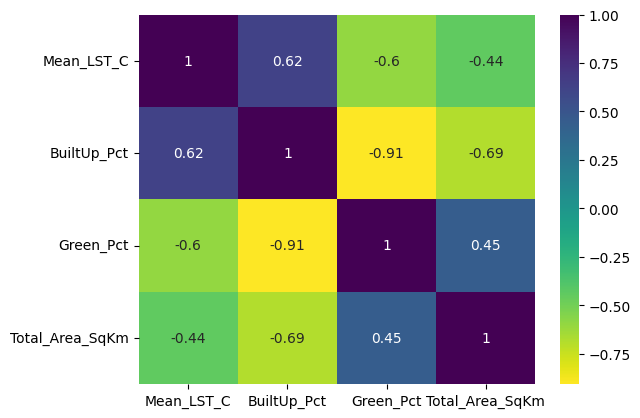

In [20]:
sns.heatmap(data=corr_data, annot=True, cmap='viridis_r')
plt.savefig("Correlation_heatmap.png", dpi=300, bbox_inches='tight') 

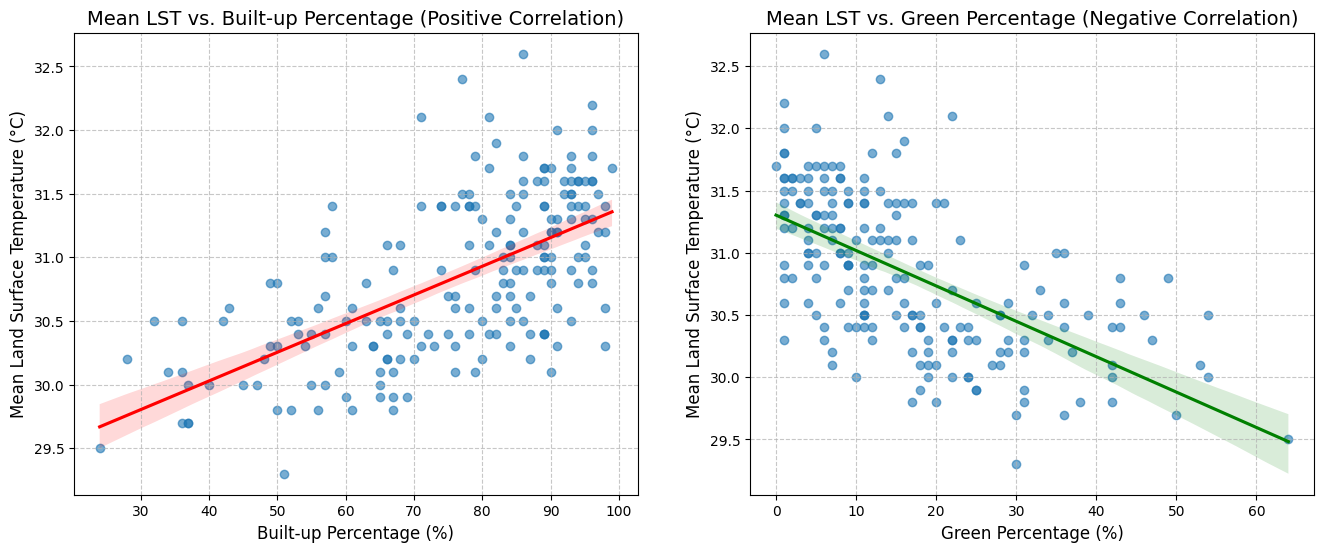

In [36]:
# Subplots for Correlation data
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Mean LST vs. Built-up Percentage
sns.regplot(data=df, x='BuiltUp_Pct', y='Mean_LST_C', ax=axes[0], scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
axes[0].set_title('Mean LST vs. Built-up Percentage (Positive Correlation)', fontsize=14)
axes[0].set_xlabel('Built-up Percentage (%)', fontsize=12)
axes[0].set_ylabel('Mean Land Surface Temperature (°C)', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Subplot 1: Mean LST vs. Green cover Percentage
sns.regplot(data=df, x='Green_Pct', y='Mean_LST_C', ax=axes[1], scatter_kws={'alpha': 0.6}, line_kws={'color': 'green'})
axes[1].set_title('Mean LST vs. Green Percentage (Negative Correlation)', fontsize=14)
axes[1].set_xlabel('Green Percentage (%)', fontsize=12)
axes[1].set_ylabel('Mean Land Surface Temperature (°C)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.savefig("Correlation_inferences.png", dpi=300, bbox_inches='tight') 

# 4. Inferences

The EDA confirms the core mechanism of the ***Urban Heat Island*** effect in Bangalore :

***Built-up Area***: Shows a clear positive correlation with Land Surface Temperature meaning as impermeable surfaces and building-density increase, Land Surface Temperature rises.

***Green Area***: Shows a distinct negative correlation with LST meaning more percentage of Vegetation coverage provides a significant cooling effect.



# 5. Model Training: Simple Linear Regression

***Linear Regression was chosen to obtain easily interpretable coefficients, quantifying the exact temperature change associated with a 1% change in built-up or green cover. The Mean Absolute Error, Root Mean Square Error  and the Residual plot value measures the model's overall performance metrics.***

- ***Linear Regression*** model is used to predict the Land Surface Temperature (Mean_LST_C) based on the Land Use/Land Cover composition.
- ***Features (X)***: BuiltUp_Pct and Green_Pct.
- ***Target (y)***: Mean_LST_C.

In [53]:
from sklearn.linear_model import LinearRegression

In [23]:
# Define features (X) and target (y)
X = df[['BuiltUp_Pct', 'Green_Pct']]
y = df['Mean_LST_C']

In [24]:
# Initialize the Linear Regression model
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
y_pred = model.predict(X)

# 6. Model Evaluation and Interpretation
- The model's performance is assessed using standard regression metrics, and its coefficients are analyzed for interpretability.
- ***Performance Metrics***:
  - Mean Absolute Error (MAE)
  - Root Mean Squared Error (RMSE)
- ***Model Interpretation***:
  - Built-up Pct Coefficient 
  - Green Pct Coefficient 
  - Intercept or Baseline Temperature (i.e. Temperature when BuiltUp_Pct = 0, Green_Pct=0)
- ***Residual Analysis***: Residuals (y - y_pred) are calculated and plotted to check/confirm the linearity assumption and homoscedasticity (variance of the residuals) of the model.

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [27]:
# Calculate Mean Absolute Error and Root Mean Squared Error value and print output 
MAE = mean_absolute_error(y, y_pred)
RMSE = np.sqrt(mean_squared_error(y, y_pred))

print(f'Mean Absiolute Error is: {MAE:.4f}')
print(f'Root Mean Squared Error is: {RMSE:.4f}')

Mean Absiolute Error is: 0.3985
Root Mean Squared Error is: 0.4892


***Observations***:
- The low MAE and RMSE values (both below $0.5^\circ\text{C}$) demonstrate that the model provides a highly accurate ward-level LST prediction.

In [28]:
model.coef_

array([ 0.01676466, -0.00839197])

In [38]:
# Output the results of model coefficients
builtup_coef = model.coef_[0]
green_coef = model.coef_[1]
intercept = model.intercept_

print(f"Coefficient for Built-up Pct: {builtup_coef:.4f} °C per 1% built-up")
print(f"Coefficient for Green Pct: {green_coef:.4f} °C per 1% green cover")
print(f"Intercept or Baseline Temperature: {intercept:.4f}")

Coefficient for Built-up Pct: 0.0168 °C per 1% built-up
Coefficient for Green Pct: -0.0084 °C per 1% green cover
Intercept or Baseline Temperature: 29.7026


***Observations***:

- For every ***1%*** increase in built-up area, the Mean Land Surface Temperature (LST) is predicted to increase by approximately ***0.0168 $^\circ\$ C***.

- For every ***1%*** increase in green area, the Mean Land Surface Temperature (LST) is predicted to decrease by approximately ***0.0084 $^\circ\$ C***.

In [30]:
# Testing the model predictions
model.predict([[53.0,39.0]])

C:\Users\rupal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.26385053])

# 7. Residual Plot

In [31]:
residuals = y - y_pred

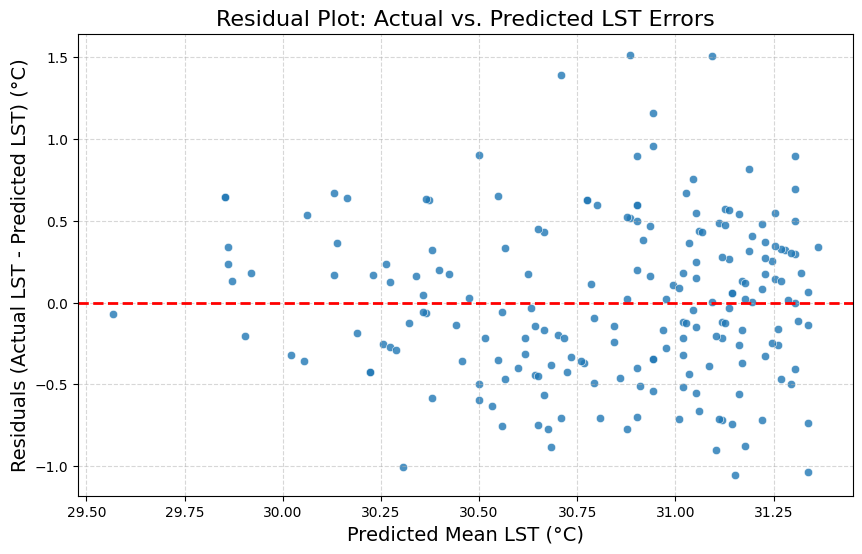

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.8)

plt.axhline(y=0, color='r', linestyle='--', linewidth=2)

plt.title('Residual Plot: Actual vs. Predicted LST Errors', fontsize=16)
plt.xlabel('Predicted Mean LST (°C)', fontsize=14)
plt.ylabel('Residuals (Actual LST - Predicted LST) (°C)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig("Residual_plot.png", dpi=300, bbox_inches='tight') 

***Observations***:
- The ***residuals*** are randomly scattered around the horizontal line at zero, indicating that the ***linear relationship*** assumption holds true.
- The ***variance (spread)*** of the model's errors is consistent ***(homoscedastic)*** for the range of predicted LST values. This ***validates the statistical reliability*** of the model and the calculated coefficients for ***BuiltUp_Pct*** and ***Green_Pct***.

# 8. Model Serialization 

- To prepare the model for deployment within an API, the trained model and its feature names are saved to disk using joblib

In [33]:
import joblib

In [34]:
# Model 
MODEL_FILENAME = 'model/lst_model.joblib'

# X Features column names
COLUMNS_FILENAME = 'model/Xcolumn_names.joblib'

# Saving the model
joblib.dump(model, MODEL_FILENAME)

# Saving the list of feature names (the column names from X)
joblib.dump(X.columns.tolist(), COLUMNS_FILENAME)

['model/Xcolumn_names.joblib']